## Decision Tree and Random Forest Projects

In [4]:
#Import main libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

We will use the **Car Evaluation Data Set** from Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [5]:
#Load Dataset
df_car = pd.read_csv("../data/raw/car_evaluation.csv", header=None)

### Exploratory Analysis

In [6]:
## Visualize data
df_car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
## Look for the shape
df_car.shape

(1728, 7)

In [8]:
## Change header names
col_names=["buying","maint","doors","persons","lug_boot","safety","class"]
df_car.columns = col_names

In [9]:
## Visualize data types
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [10]:
## Explore targeting value
df_car['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [11]:
#Verify missing values
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Data Processing

In [12]:
#Define X and y
X = df_car.drop(['class'], axis = 1)
y = df_car['class']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

### Model Training with Decision Tree

In [15]:
## Convert our categorical data types
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons','lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [17]:
#Import decision tree
from sklearn.tree import DecisionTreeClassifier

#Model creation
tree = DecisionTreeClassifier(max_depth=2, random_state = 0)

In [18]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [19]:
# Predictions
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

#### Evaluate tree model

In [20]:
from sklearn.metrics import accuracy_score

#Accuracy for train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Accuracy for test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en train es:', train_accuracy_tree)
print('El accuracy en test es:', test_accuracy_tree)

El accuracy en train es: 0.7733664185277088
El accuracy en test es: 0.7591522157996147


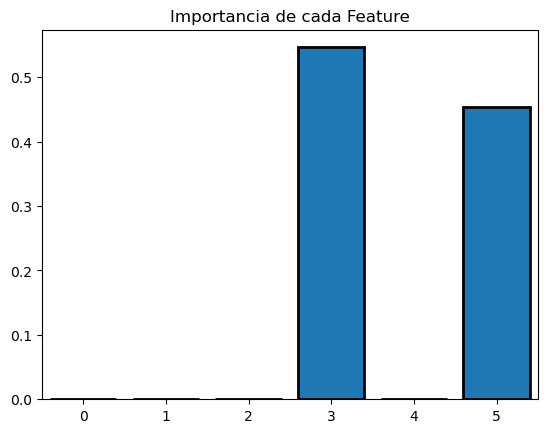

In [21]:
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(importances, saturation = 2.0, edgecolor ='black', linewidth = 2)
plt.title('Importancia de cada Feature')
plt.show()

### Model Training with Randon forest

In [33]:
#Import random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 4, random_state =0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=0)

In [34]:
#Make predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

#Accuracy for train
train_accuracy_rf =accuracy_score(y_train, y_train_pred_rf)

#Accuracy for test
test_accuracy_rf =accuracy_score(y_test, y_test_pred_rf)

print('El accuracy en train es:', train_accuracy_rf)
print('El accuracy en test es:', test_accuracy_rf)

El accuracy en train es: 0.9760132340777502
El accuracy en test es: 0.8747591522157996


In [25]:
# Visualize feature importance
features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

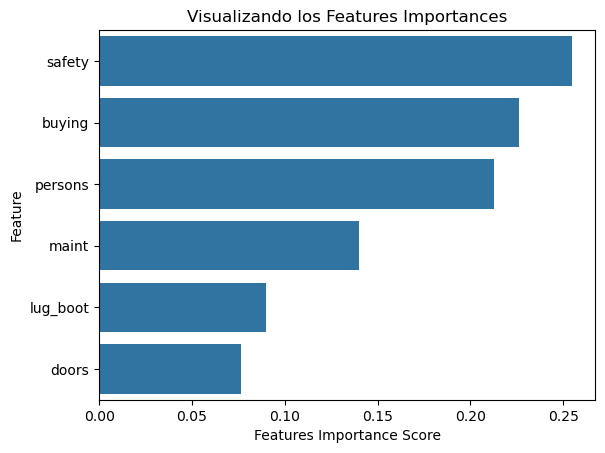

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores , y = features_scores.index)
plt.xlabel('Features Importance Score')
plt.ylabel('Feature')
plt.title("Visualizando los Features Importances")
plt.show()

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_pred_rf)

print('Matriz de Confusion\n\n', cm)

Matriz de Confusion

 [[ 94   4  19   1]
 [ 11   7   0   1]
 [ 10   0 348   0]
 [ 12   1   0  11]]


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519

